In [44]:
import numpy as np
import matplotlib.pyplot as plt


In [45]:
def f_true(x):
    return 0.03 * x ** 4 - 0.4 * x ** 2 + 0.7 * np.sin(2.2 * x)

def make_poly_features(x, degree):
    x = np.asarray(x).reshape(-1, 1)
    X = np.hstack([x ** i for i in range(degree + 1)])
    return X

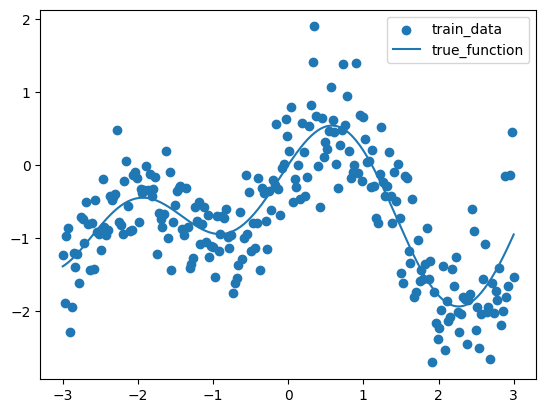

In [46]:
rng = np.random.default_rng(42)

N = 250
x = np.linspace(-3, 3, N)

sigma = 0.5
y = f_true(x) + rng.normal(0, sigma, size=x.shape)

degree = 15
X = make_poly_features(x, degree)

plt.scatter(x, y, label='train_data')
plt.plot(x, f_true(x), label='true_function')
plt.legend()
plt.show()

In [47]:
lamb = 1.0
alpha = 1.0 / (sigma ** 2)

M = X.shape[1]
posterior_cov_inv = lamb * np.eye(M) + alpha * (X.T @ X)

In [48]:
posterior_cov = np.linalg.inv(posterior_cov_inv)
mean = alpha * posterior_cov @ (X.T @ y)

In [49]:
x_new = np.linspace(-3, 3, 400)
X_new = make_poly_features(x_new, degree)

mean_pred = X_new @ mean
var_pred = 1.0 / alpha + np.sum(X_new @ posterior_cov @ X_new.T, axis=1)
std_pred = np.sqrt(var_pred)

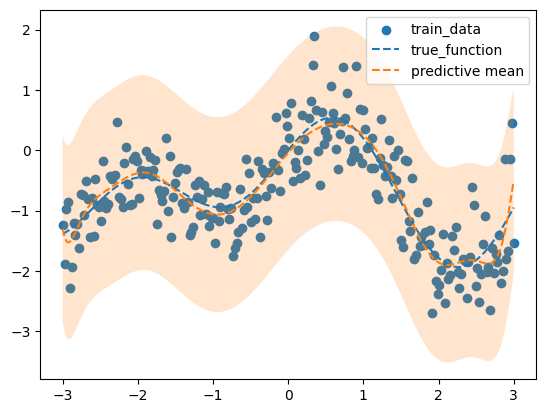

In [50]:
plt.scatter(x, y, label='train_data')
plt.plot(x_new, f_true(x_new), linestyle='--', label='true_function')
plt.plot(x_new, mean_pred, linestyle='--', label='predictive mean')

plt.fill_between(x_new, mean_pred - 2 * std_pred, mean_pred + 2 * std_pred, alpha=0.2)

plt.legend()
plt.show()

In [ ]:
def log_evidence(lamb, X, y, alpha):
    N, M = X.shape
    
    C = (1.0 / alpha) * np.eye(N) + (1.0 / (alpha * lamb)) * (X @ X.T)
    log_det_C = np.linalg.slogdet(C)[1]
    eps = 1e-12 * np.trace(C) / N
    
    L = np.linalg.cholesky(C + eps * np.eye(N))
    z = np.linalg.solve(L, y)
    log_evidence_val = -0.5 * (N * np.log(2 * np.pi) + log_det_C + z @ z)
    
    return log_evidence_val

lambdas = np.logspace(-6, 3, 160)
log_evs = np.array([log_evidence(lmb, X, y, alpha) for lmb in lambdas])

best_idx = int(np.nanargmax(log_evs))
best_lamb = float(lambdas[best_idx])

print(f'Лучшая lambda: {best_lamb:.6g}')


Лучшая lambda: 0.593724


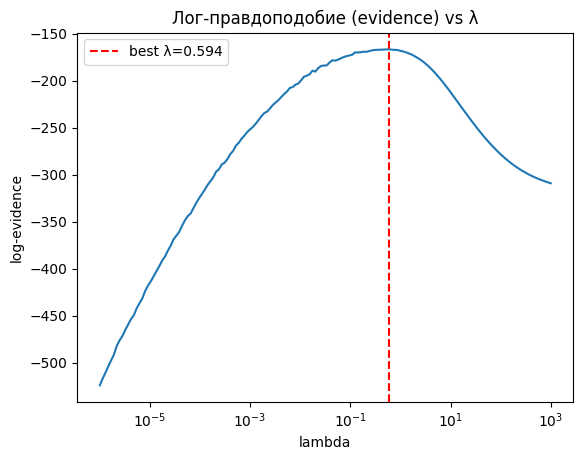

In [ ]:
plt.figure()
plt.semilogx(lambdas, log_evs)
plt.axvline(best_lamb, color='r', linestyle='--', label=f'best λ={best_lamb:.3g}')
plt.xlabel('lambda')
plt.ylabel('log-evidence')
plt.title('Лог-правдоподобие (evidence) vs λ')
plt.legend()
plt.show()


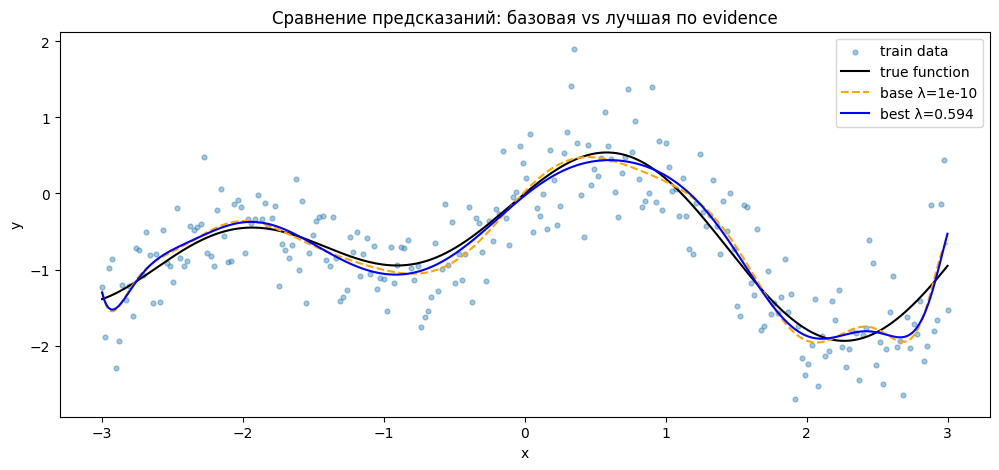

In [ ]:
x_new = np.linspace(-3, 3, 400)
X_new = make_poly_features(x_new, degree)

lamb_base = 1e-10
A_base = lamb_base * np.eye(X.shape[1]) + (1 / sigma**2) * (X.T @ X)
mean_base = (1 / sigma**2) * np.linalg.solve(A_base, X.T @ y)
mean_pred_base = X_new @ mean_base

A_best = best_lamb * np.eye(X.shape[1]) + (1 / sigma**2) * (X.T @ X)
mean_best = (1 / sigma**2) * np.linalg.solve(A_best, X.T @ y)
mean_pred_best = X_new @ mean_best

plt.figure(figsize=(12, 5))
plt.scatter(x, y, s=12, alpha=0.4, label='train data')
plt.plot(x_new, f_true(x_new), color='k', linewidth=1.5, label='true function')
plt.plot(x_new, mean_pred_base, linestyle='--', color='orange', 
         label=f'base λ={lamb_base:.3g}')
plt.plot(x_new, mean_pred_best, linestyle='-', color='blue', 
         label=f'best λ={best_lamb:.3g}')
plt.legend()
plt.title('Сравнение предсказаний: базовая vs лучшая по evidence')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

